In [1]:
#SQLalchemy Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql import func

In [2]:
# Dependencies
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date, timedelta
from  matplotlib.ticker import FuncFormatter

# Climate Analysis and Exploration

In [3]:
engine = create_engine("sqlite:///hawai2i.sqlite")

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()


['measurements', 'stations']

In [5]:
# Assign the [measurements and stations] class to a variable called `measurements and stations`
measurements = Base.classes.measurements
stations = Base.classes.stations

In [6]:
# Create a session
session = Session(engine)

In [7]:
# Display the row's columns and data in dictionary format
prcp_data = session.query(measurements).first()
prcp_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a1076e358>,
 'date': '2010-01-01',
 'id': 0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [8]:
# Display the row's columns and data in dictionary format
station_data = session.query(stations).first()
station_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a1076ef60>,
 'elevation': 3.0,
 'id': 0,
 'latitude': 21.2716,
 'location': None,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

# Precipitation Analysis

In [9]:
df = pd.DataFrame(session.query(measurements.station,
                                measurements.date,
                                measurements.prcp,
                                measurements.tobs).all())
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,0.03,73


In [10]:
prcp_analysis_df = df[['date', 'prcp']]
prcp_analysis_df.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,0.03


In [11]:
prcp_year_df = prcp_analysis_df[(prcp_analysis_df['date'] > '2016-08-23') & (prcp_analysis_df['date'] <= '2017-08-23')]
prcp_year_df.head()

,date,prcp
2364,2016-08-24,0.08
2365,2016-08-25,0.08
2366,2016-08-26,0.00
2367,2016-08-27,0.00
2368,2016-08-28,0.01


In [12]:
prcp_year_df.dtypes # try to redefine the type of data at creation step. 

date     object
prcp    float64
dtype: object

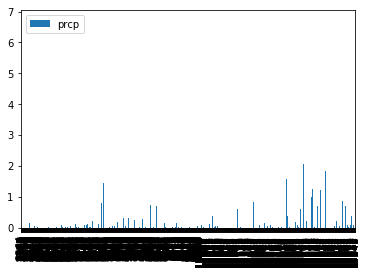

In [13]:
my_plot = prcp_year_df.plot(kind='bar')
plt.show()

# Station Analysis

In [14]:
#station_count = session.query(stations.station).count()
#station_count